__TASKS__

1. READ IN PROPERTIES AND TARGETS DATA  

2. COMBINE 2016 PROPERTIES AND TARGETS AND 2017
   

In [1]:
# import libraries that will be used throughout the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.DEBUG)

DirBase = "/Volumes/wms_ssd/Qualifying Exam/"

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
logging.debug("READING IN 2016 TARGET SET...")
target_2016_df = pd.read_csv(DirBase+"Input/train_2016_mod.csv")

logging.debug("READING IN 2017 TARGET SET...")
target_2017_df = pd.read_csv(DirBase+"Input/train_2017_mod.csv")

logging.debug("READING IN 2016 PROPERTIES...")
properties_2016_df = pd.read_csv(DirBase+"Input/properties_2016_mod.csv")

logging.debug("READING IN 2017 PROPERTIES...")
properties_2017_df = pd.read_csv(DirBase+"Input/properties_2017_mod.csv")

DEBUG:root:READING IN 2016 TARGET SET...
DEBUG:root:READING IN 2017 TARGET SET...
DEBUG:root:READING IN 2016 PROPERTIES...
DEBUG:root:READING IN 2017 PROPERTIES...


In [3]:
length_target_2016 = target_2016_df.shape[0]
length_target_2017 = target_2017_df.shape[0]
length_properties_2016 = properties_2016_df.shape[0]
length_properties_2017 = properties_2017_df.shape[0]
length_target_combined = length_target_2016 + length_target_2017

logging.debug("{} TRANSACTIONS IN 2016".format(length_target_2016))
logging.debug("{} TRANSACTIONS IN 2017".format(length_target_2017))
logging.debug("{} TRANSACTIONS COMBINED".format(length_target_combined))
logging.debug("{} PROPERTY SAMPLES".format(length_properties_2017))

DEBUG:root:90275 TRANSACTIONS IN 2016
DEBUG:root:77613 TRANSACTIONS IN 2017
DEBUG:root:167888 TRANSACTIONS COMBINED
DEBUG:root:2985217 PROPERTY SAMPLES


In [4]:
properties_parcelid_set = properties_2017_df['parcelid'].unique()

target_2016_set = target_2016_df['parcelid'].unique()

target_2017_set = target_2017_df['parcelid'].unique()

target_combined_set = list(set(target_2016_set) | set(target_2017_set))

no_feature_set = list(set(target_combined_set) - set(properties_parcelid_set))

logging.debug("{} UNIQUE IDS IN 2016; {:.2f}% UNIQUE; {:.2f}% TOTAL".format(len(target_2016_set), len(target_2016_set)/length_target_2016*100, len(target_2016_set)/len(properties_parcelid_set)*100))
logging.debug("{} UNIQUE IDS IN 2017; {:.2f}% UNIQUE; {:.2f}% TOTAL".format(len(target_2017_set), len(target_2017_set)/length_target_2017*100, len(target_2017_set)/len(properties_parcelid_set)*100))
logging.debug("{} UNIQUE IDS COMBINED; {:.2f}% UNIQUE; {:.2f}% TOTAL".format(len(target_combined_set), len(target_combined_set)/length_target_combined*100, len(target_combined_set)/len(properties_parcelid_set)*100))
logging.debug("{} UNIQUE PARCELIDS TOTAL".format(len(properties_parcelid_set)))
logging.debug("{} PROPERTIES WITH SALES DATA BUT NO FEATURES".format(len(no_feature_set)))
logging.debug(no_feature_set)

DEBUG:root:90150 UNIQUE IDS IN 2016; 99.86% UNIQUE; 3.02% TOTAL
DEBUG:root:77414 UNIQUE IDS IN 2017; 99.74% UNIQUE; 2.59% TOTAL
DEBUG:root:165210 UNIQUE IDS COMBINED; 98.40% UNIQUE; 5.53% TOTAL
DEBUG:root:2985217 UNIQUE PARCELIDS TOTAL
DEBUG:root:0 PROPERTIES WITH SALES DATA BUT NO FEATURES
DEBUG:root:[]


_Ok. So we have some readings on the data. Let's merge some datasets!_

In [5]:
combined_2016_df = pd.merge(target_2016_df, properties_2016_df, on='parcelid', how='left')
combined_2017_df = pd.merge(target_2017_df, properties_2017_df, on='parcelid', how='left')

logging.debug(combined_2016_df.head(3).transpose())
logging.debug(combined_2017_df.head(3).transpose())

DEBUG:root:                                                 0           1           2
parcelid                                  11016594    14366692    12098116
logerror                                    0.0276     -0.1684      -0.004
transactiondate                         2016-01-01  2016-01-01  2016-01-01
weekday                                          4           4           4
year                                          2016        2016        2016
month                                            1           1           1
day                                              1           1           1
holiday                                          1           1           1
AWND                                          4.03        4.03        4.03
PRCP                                             0           0           0
SNOW                                             0           0           0
SNWD                                             0           0           0
TAVG          

In [6]:
total_df = pd.concat([combined_2016_df, combined_2017_df], ignore_index=True)

logging.debug(total_df.shape)

logging.debug(total_df.columns.tolist())

DEBUG:root:(167888, 102)
DEBUG:root:['parcelid', 'logerror', 'transactiondate', 'weekday', 'year', 'month', 'day', 'holiday', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT08', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'yearssincedelinquent', 'centralac', 'otherac', 'centralheat', 'floorwallheat', 'otherheat', '

In [7]:
total_df.to_csv("Input/data.csv", sep=',', encoding='utf-8', index=False)

In [7]:
unique = total_df['SNOW'].unique()

logging.debug(unique)

# plt.close()
# plt.hist(unique)
# plt.show()

DEBUG:root:[ 0.]


_It looks like 'SNOW' and 'SNWD' have only one unique value, so we will get rid of those._

In [8]:
del total_df['SNOW']
del total_df['SNWD']

In [9]:
pd.options.display.max_rows = 65

dtype_df = total_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,weekday,int64
4,year,int64
5,month,int64
6,day,int64
7,holiday,int64
8,AWND,float64
9,PRCP,float64


In [12]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,13
1,float64,47
2,object,1


In [13]:
total_df.to_csv("Input/data.csv", sep=',', encoding='utf-8', index=False)

In [ ]:
logging.debug("READING IN TOTAL DATA SET...")
total_df = pd.read_csv("Input/data.csv")

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/admiral/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/admiral/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


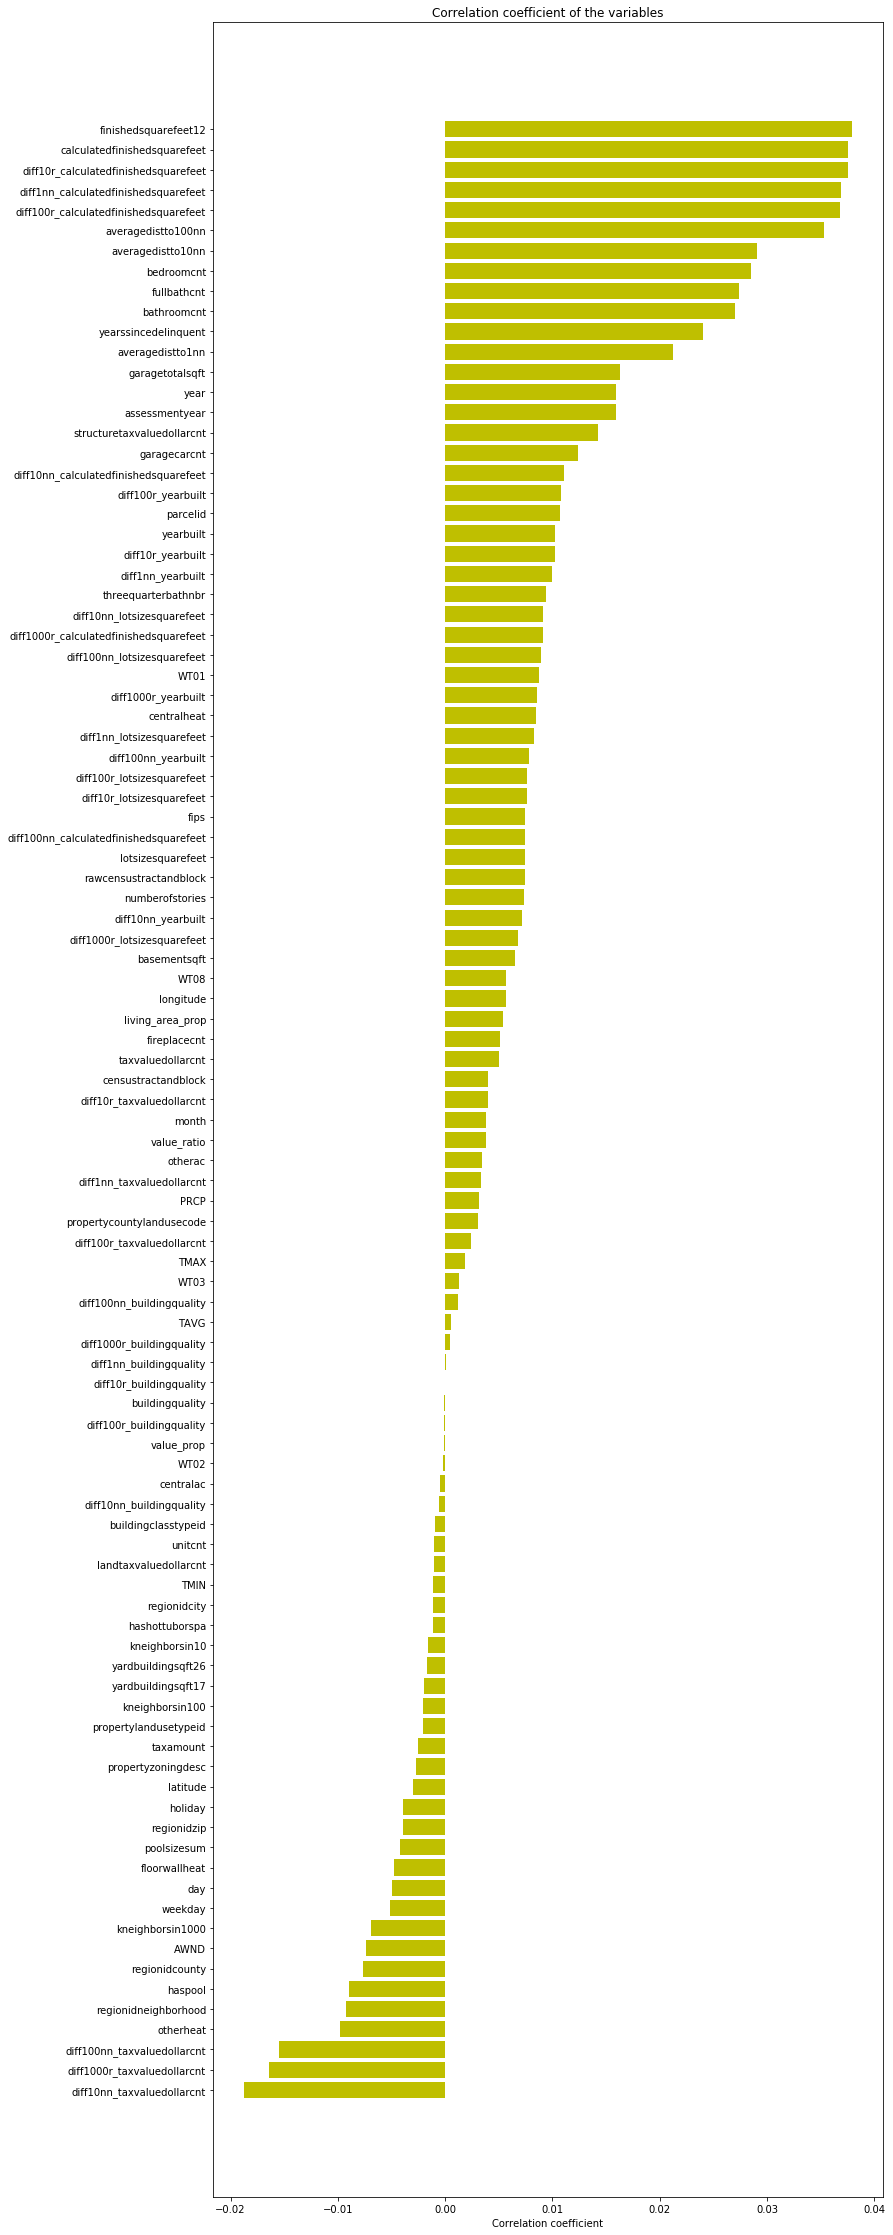

In [10]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in total_df.columns if col not in ['logerror'] if total_df[col].dtype!='object']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(total_df[col].values, total_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [11]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.01) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
87,diff10nn_taxvaluedollarcnt,-0.018789
91,diff1000r_taxvaluedollarcnt,-0.016416
88,diff100nn_taxvaluedollarcnt,-0.015469
71,diff10r_yearbuilt,0.010207
43,yearbuilt,0.010210
0,parcelid,0.010730
72,diff100r_yearbuilt,0.010817
75,diff10nn_calculatedfinishedsquarefeet,0.011101
24,garagecarcnt,0.012422
45,structuretaxvaluedollarcnt,0.014280


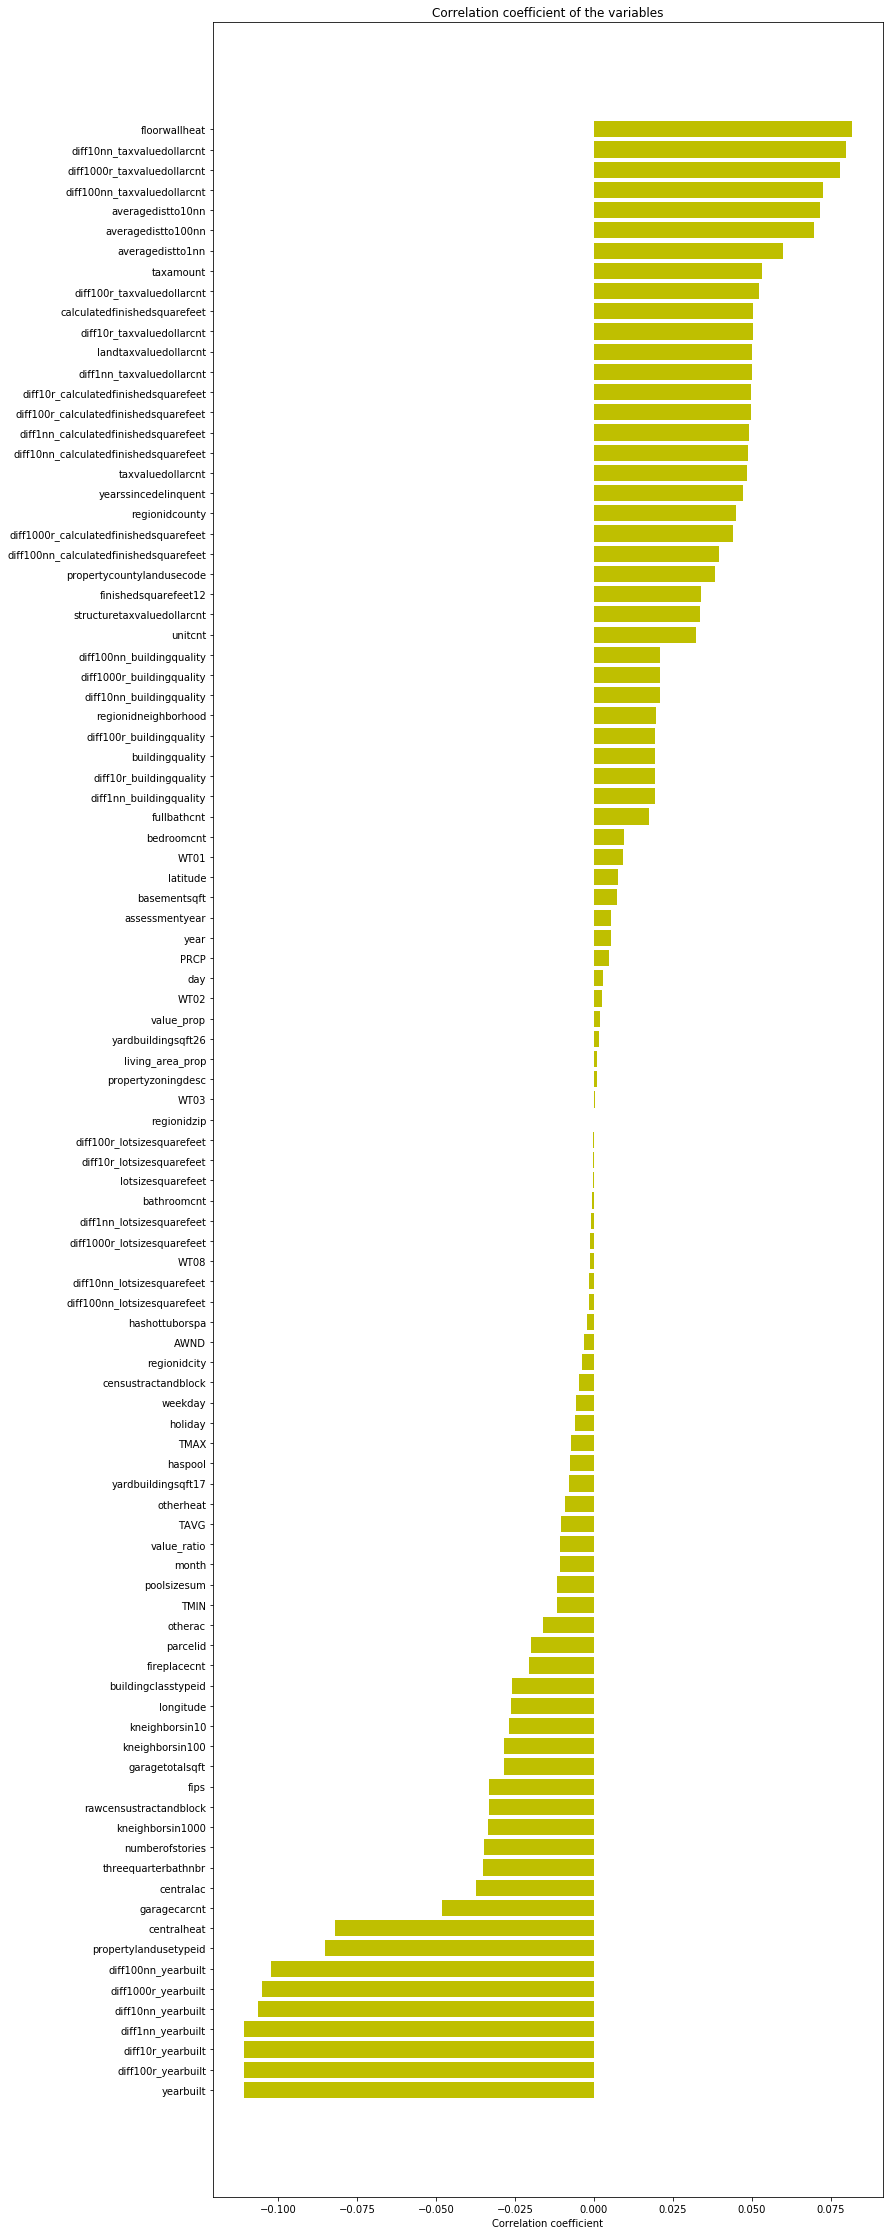

In [12]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in total_df.columns if col not in ['logerror', 'outlier'] if total_df[col].dtype!='object']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(total_df[col].values, total_df.logerror.abs())[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [14]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
corr_df_sel

,col_labels,corr_values
43,yearbuilt,-0.110911
72,diff100r_yearbuilt,-0.110907
71,diff10r_yearbuilt,-0.110868
68,diff1nn_yearbuilt,-0.110815
69,diff10nn_yearbuilt,-0.106324
73,diff1000r_yearbuilt,-0.104962
70,diff100nn_yearbuilt,-0.102144
32,propertylandusetypeid,-0.085225
54,centralheat,-0.081948
48,landtaxvaluedollarcnt,0.050195


__TASKS__

_We will perform modeling at least two different ways._

1. TRAIN A MODEL ON MONTH AND YEAR DATA TO PERFORM MONTLY-LEVEL PREDICTIONS CONSISTENT WITH THE OUTPUT

2. TRAIN A MODEL TO MAKE DAILY PREDICTIONS  
    A. TRAIN THE MODEL  
    B. DETERMINE A WAY TO ACCUMULATE DAILY PREDICTION INTO ONE FOR AN ENTIRE MONTH
   

In [20]:
month_data_df = total_df.copy()

In [21]:
logging.debug(month_data_df.columns.tolist())

DEBUG:root:['parcelid', 'logerror', 'transactiondate', 'weekday', 'year', 'month', 'day', 'holiday', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT08', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'yearssincedelinquent', 'centralac', 'otherac', 'centralheat', 'floorwallheat', 'otherheat', 'buildingquality', 'haspool']


_We will need to drop all data that deals directly with daily data._

In [22]:
delete = ['weekday', 'day', 'holiday', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT08']

for d in delete:
    del month_data_df[d]

logging.debug(month_data_df.columns.tolist())

DEBUG:root:['parcelid', 'logerror', 'transactiondate', 'year', 'month', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'yearssincedelinquent', 'centralac', 'otherac', 'centralheat', 'floorwallheat', 'otherheat', 'buildingquality', 'haspool']


_We will also need to drop the 'parcelid' and 'transactiondate' variables._

In [23]:
del month_data_df['parcelid']
del month_data_df['transactiondate']

_For starters we will use scikitlearn's DecisionTreeRegressor class to see what basic results we might get. We will closely follow the steps [outlined here](http://stackabuse.com/decision-trees-in-python-with-scikit-learn/)._

In [24]:
month_data_df.head()

,logerror,year,month,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxamount,censustractandblock,yearssincedelinquent,centralac,otherac,centralheat,floorwallheat,otherheat,buildingquality,haspool
0,0.0276,2016,1,0.0,2.0,3.0,5.0,1684.0,1684.0,6037.0,...,6735.88,6.037107e+13,0.0,1,0,1.0,0.0,0,2.0,0.0
1,-0.1684,2016,1,0.0,3.5,4.0,5.0,2263.0,2263.0,6059.0,...,10153.02,6.059032e+13,0.0,0,0,1.0,0.0,0,2.0,0.0
2,-0.0040,2016,1,0.0,3.0,2.0,5.0,2217.0,2217.0,6037.0,...,11484.48,6.037464e+13,0.0,1,0,1.0,0.0,0,2.0,0.0
3,0.0218,2016,1,0.0,2.0,2.0,5.0,839.0,839.0,6037.0,...,3048.74,6.037296e+13,0.0,1,0,1.0,0.0,0,2.0,0.0
4,-0.0050,2016,1,0.0,2.5,4.0,5.0,2283.0,2283.0,6059.0,...,5488.96,6.059042e+13,0.0,0,0,1.0,0.0,0,2.0,1.0


In [25]:
month_data_df.describe()

,logerror,year,month,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxamount,censustractandblock,yearssincedelinquent,centralac,otherac,centralheat,floorwallheat,otherheat,buildingquality,haspool
count,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,...,167888.000000,1.678880e+05,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000,167888.000000
mean,0.013906,2016.462290,5.485437,0.385197,2.288207,3.041730,4.999809,1781.060642,1740.312137,6048.842085,...,5990.008419,6.049406e+13,0.079071,0.296948,0.023432,0.752948,0.216513,0.024356,3.155377,0.202838
std,0.165706,0.498577,2.641648,21.320744,1.000743,1.149018,0.014230,943.828323,915.403749,20.700777,...,7215.874100,1.051495e+12,0.543011,0.456915,0.151272,0.431298,0.411869,0.154151,1.061182,0.402114
min,-4.655420,2016.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,6037.000000,...,19.920000,6.037101e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-0.025300,2016.000000,3.000000,0.000000,2.000000,2.000000,5.000000,1184.000000,1166.000000,6037.000000,...,2798.097500,6.037312e+13,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,0.006000,2016.000000,6.000000,0.000000,2.000000,3.000000,5.000000,1543.000000,1507.000000,6037.000000,...,4501.060000,6.037604e+13,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
75%,0.039200,2017.000000,8.000000,0.000000,3.000000,4.000000,5.000000,2106.000000,2045.000000,6059.000000,...,6914.680000,6.059042e+13,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
max,5.262999,2017.000000,12.000000,3560.000000,20.000000,16.000000,5.000000,35640.000000,21929.000000,6111.000000,...,586639.300000,4.830301e+14,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [26]:
X = month_data_df.drop('logerror', axis=1)  
y = month_data_df['logerror']  

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

_We need to standardize the data in order before we train a model._

In [42]:
mean = X_train.mean()
stddev = X_train.std()

X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev

In [43]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
y_pred = regressor.predict(X_test)  

In [45]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df 

,Actual,Predicted
90220,0.376400,-0.006000
163097,0.018340,0.001000
167694,0.026982,0.021010
97592,-0.151502,-0.174093
155670,-0.014437,-0.001892
131112,0.078622,-0.016100
135701,0.132480,0.022046
36475,0.067700,-0.221900
164411,-0.081247,0.038685
12857,-0.036700,0.016798


In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.115872886257
Mean Squared Error: 0.0623729360782
Root Mean Squared Error: 0.249745742863


_Let's go ahead and output these predictions into a file and see if we beat just the average._

In [32]:
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
logging.debug("CREATING PREDICTION PERIOD FRAMES...")
predict_201610_df = pd.DataFrame({'year': np.array([2016]*properties_2017_df.shape[0]), 'month': np.array([10]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})
predict_201611_df = pd.DataFrame({'year': np.array([2016]*properties_2017_df.shape[0]), 'month': np.array([11]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})
predict_201612_df = pd.DataFrame({'year': np.array([2016]*properties_2017_df.shape[0]), 'month': np.array([12]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})
predict_201710_df = pd.DataFrame({'year': np.array([2017]*properties_2017_df.shape[0]), 'month': np.array([10]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})
predict_201711_df = pd.DataFrame({'year': np.array([2017]*properties_2017_df.shape[0]), 'month': np.array([11]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})
predict_201712_df = pd.DataFrame({'year': np.array([2017]*properties_2017_df.shape[0]), 'month': np.array([12]*properties_2017_df.shape[0]), 'parcelid': properties_2017_df['parcelid'].values})

logging.debug("MERGING PROPERTY DATA...")
predict_201610_df = pd.merge(predict_201610_df, properties_2016_df, on='parcelid', how='left')
predict_201611_df = pd.merge(predict_201611_df, properties_2016_df, on='parcelid', how='left')
predict_201612_df = pd.merge(predict_201612_df, properties_2016_df, on='parcelid', how='left')
predict_201710_df = pd.merge(predict_201710_df, properties_2017_df, on='parcelid', how='left')
predict_201711_df = pd.merge(predict_201711_df, properties_2017_df, on='parcelid', how='left')
predict_201712_df = pd.merge(predict_201712_df, properties_2017_df, on='parcelid', how='left')

logging.debug("REMOVING PARCELID...")
del predict_201610_df['parcelid']
del predict_201611_df['parcelid']
del predict_201612_df['parcelid']
del predict_201710_df['parcelid']
del predict_201711_df['parcelid']
del predict_201712_df['parcelid']

logging.debug("PREDICTING 2016-10...")
y_201610 = regressor.predict(predict_201610_df)
logging.debug("PREDICTING 2016-11...")
y_201611 = regressor.predict(predict_201611_df)
logging.debug("PREDICTING 2016-12...")
y_201612 = regressor.predict(predict_201612_df)
logging.debug("PREDICTING 2017-10...")
y_201710 = regressor.predict(predict_201710_df)
logging.debug("PREDICTING 2017-11...")
y_201711 = regressor.predict(predict_201711_df)
logging.debug("PREDICTING 2017-12...")
y_201712 = regressor.predict(predict_201712_df)

logging.debug("COMBINING RESULTS...")
new_df = pd.DataFrame({'parcelid': properties_2017_df['parcelid'].values, '201610': y_201610, '201611': y_201611, '201612': y_201612, '201710': y_201710, '201711': y_201711, '201712': y_201712})

logging.debug(new_df.head(10))

logging.debug("WRITING OUT RESULTS...")
new_df.to_csv("Output/dummy_submission.csv", sep=',', encoding='utf-8', index=False)

DEBUG:root:CREATING PREDICTION PERIOD FRAMES...
DEBUG:root:MERGING PROPERTY DATA...
DEBUG:root:REMOVING PARCELID...
DEBUG:root:PREDICTING 2016-10...
DEBUG:root:PREDICTING 2016-11...
DEBUG:root:PREDICTING 2016-12...
DEBUG:root:PREDICTING 2017-10...
DEBUG:root:PREDICTING 2017-11...
DEBUG:root:PREDICTING 2017-12...
DEBUG:root:COMBINING RESULTS...
DEBUG:root:   parcelid    201610    201611    201612    201710    201711    201712
0  10754147 -0.065100 -0.065100 -0.065100 -0.065100 -0.065100 -0.065100
1  10759547  0.026600  0.026600  0.026600  0.026600  0.026600  0.026600
2  10843547 -0.002431 -0.002431 -0.002431  0.121300  0.121300  0.121300
3  10859147  1.301000  1.301000  1.301000  1.301000  1.301000  1.301000
4  10879947 -0.141600 -0.141600 -0.141600 -0.588177 -0.588177 -0.588177
5  10898347 -0.141600 -0.141600 -0.141600 -0.588177 -0.588177 -0.588177
6  10933547 -0.426200 -0.426200 -0.426200 -0.426200 -0.426200 -0.426200
7  10940747  0.057300  0.057300  0.057300 -0.588177 -0.588177 -0.58

_CONCLUSION: So we ran that first model and the results are pretty dismal. It had double the error compared to the entry of all 0's. We will have to make some real improvement in our analysis._

_Another track we could take would be to train two distinct models. One would be responsible for determining whether or not the property will belong to an 'overvalued' or 'undervalued' class. Then the other model will perform the regression on absolute logerror. If done well this could yield drastic benefits over the previous model where many samples were predicted on the wrong side of 0._ 

_First we will need to go add labels to our dataset (-1 for underestimate and 1 for overestimate)._

In [54]:
total_df['sign'] = total_df.apply(lambda row: -1 if row['logerror'] < 0 else 1, axis=1)

logging.debug(total_df.head(3).transpose())

DEBUG:root:                                        0            1            2
parcelid                         11016594     14366692     12098116
logerror                           0.0276      -0.1684       -0.004
transactiondate                2016-01-01   2016-01-01   2016-01-01
weekday                                 4            4            4
year                                 2016         2016         2016
month                                   1            1            1
day                                     1            1            1
holiday                                 1            1            1
AWND                                 4.03         4.03         4.03
PRCP                                    0            0            0
TAVG                                   54           54           54
TMAX                                   67           67           67
TMIN                                   42           42           42
WT01                                 

_Great! Now we will mostly follow the steps of the regression above._

In [56]:
month_data_df = total_df.copy()

In [57]:
logging.debug(month_data_df.columns.tolist())

DEBUG:root:['parcelid', 'logerror', 'transactiondate', 'weekday', 'year', 'month', 'day', 'holiday', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT08', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'yearssincedelinquent', 'centralac', 'otherac', 'centralheat', 'floorwallheat', 'otherheat', 'buildingquality', 'haspool', 'sign']


In [58]:
delete = ['weekday', 'day', 'holiday', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT08']

for d in delete:
    del month_data_df[d]

logging.debug(month_data_df.columns.tolist())

DEBUG:root:['parcelid', 'logerror', 'transactiondate', 'year', 'month', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'yearssincedelinquent', 'centralac', 'otherac', 'centralheat', 'floorwallheat', 'otherheat', 'buildingquality', 'haspool', 'sign']


In [59]:
del month_data_df['parcelid']
del month_data_df['transactiondate']
del month_data_df['logerror']

In [60]:
X = month_data_df.drop('sign', axis=1)  
y = month_data_df['sign']

In [61]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [62]:
mean = X_train.mean()
stddev = X_train.std()

X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  
clf.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
y_pred = clf.predict(X_test)

In [67]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df 

,Actual,Predicted
90220,1,-1
163097,1,-1
167694,1,1
97592,-1,-1
155670,-1,-1
131112,1,-1
135701,1,-1
36475,1,1
164411,-1,-1
12857,-1,1


In [68]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 6874  7766]
 [ 8102 10836]]
             precision    recall  f1-score   support

         -1       0.46      0.47      0.46     14640
          1       0.58      0.57      0.58     18938

avg / total       0.53      0.53      0.53     33578



_That is still not great.. Let's try an MLP classifier and see if it does any better._

In [69]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)                       

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [73]:
y_pred = clf.predict(X_train)

In [74]:
df=pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
df 

,Actual,Predicted
99280,-1,1
96402,1,1
115953,1,1
165349,1,1
122509,-1,1
27323,-1,1
110281,-1,-1
14162,1,1
120812,-1,1
140947,1,1


In [75]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_train, y_pred))  
print(classification_report(y_train, y_pred)) 

[[ 9278 49465]
 [ 7711 67856]]
             precision    recall  f1-score   support

         -1       0.55      0.16      0.25     58743
          1       0.58      0.90      0.70     75567

avg / total       0.56      0.57      0.50    134310

